# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

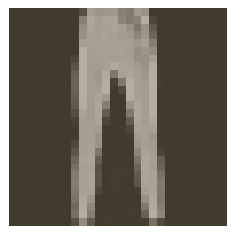

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

>**Exercise 4.1:** Build your own network based on these suggestion.

In [3]:
## Exercise 4.1:
## TODO: Define your network architecture here
from torch import nn

# Yhden piilokerroksen verkko
model1 = nn.Sequential(nn.Linear(784,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1))

# Inputille ja hiddeneille ReLU-aktivointifunktio ja outputille LogSoftmaxi
# Inputiksi 784, koska kuvat ovat 28x28 eli 784 pixeliä
# Hiddeneiden output aina puolittuu
# Outputiksi 10, koska kuvat jaetaan kymmeneen eri luokkaan

# Kolmen hidden layerin verkko
model2 = nn.Sequential(nn.Linear(784,256),
                       nn.ReLU(),
                       nn.Linear(256,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,32),
                       nn.ReLU(),
                       nn.Linear(32,10),
                       nn.LogSoftmax(dim=1))

# Määritellään malli
model = model1 

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.


>**Exercise 4.2:** Create network (model), define loss (criterion) and define optimizer.
>
>**Exercise 4.3:** Train the network.
>
>**Exercise 4.4:** Calculate the class probabilities for network output.


In [4]:
## Exercise 4.2:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()


# Optimizeriksi kokeillaan SGD:tä ja sen parametreiksi verkon parametrit sekä learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.003)
print("Specs of the network:")
print("\n-------------------------------------------------------------")
print("\nModel:", model)
print("\n-------------------------------------------------------------")
print("\nLoss:", criterion)
print("\n-------------------------------------------------------------")
print("\nOptimizer:", optimizer)

Specs of the network:

-------------------------------------------------------------

Model: Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

-------------------------------------------------------------

Loss: CrossEntropyLoss()

-------------------------------------------------------------

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.003
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [6]:
## Exercise 4.3:
# TODO: Train the network here (see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.)
# Calculate 5 epochs and print "Training Loss:" after every epoch

# Asetetaan viisi koulutuskierrosta (epochs)
koulutuskierrokset = 5
for kierros in range(koulutuskierrokset):
    runningloss = 0
    for image, label in trainloader:
        # Muutetaan kuvat vektoriksi view metodia käyttäen
        # Vektorin pituus on imagen koko (ensimmäisestä viimeiseen)
        image = image.view(image.shape[0], -1)
        # Nollataan edelliset gradientit ennen uutta ajoa
        optimizer.zero_grad()
        # Määritetään tulo ajamalla data verkon läpi
        output = model(image)
        # Määritellään loss-arvo ajamalla output ja oikea luokka virhefunktion läpi
        loss = criterion(output,label)
        # Käytetään backward-metodia gradienttien laskemiseen
        loss.backward()
        # Päivitetään uudet painoarvot
        optimizer.step()
        
        runningloss += loss.item()
    else:
        print(f"Training loss: {runningloss/len(trainloader)}")        

Training loss: 0.8550967487699187
Training loss: 0.6793823423606755
Training loss: 0.6087733765464347
Training loss: 0.5644531413944546
Training loss: 0.5331031113926535


Testasin molempia verkkoja. Hidden layereiden määrä ei tässä tapauksessa tuntunut merkittävästi vaikuttavan virheeseen.

Virheen kuuluisi pienytyä kokoajan eikä heilahdella. Jos se heilahtelee virhe voi olla batchin koossa (liian pieni), koodissa tai verkossa.

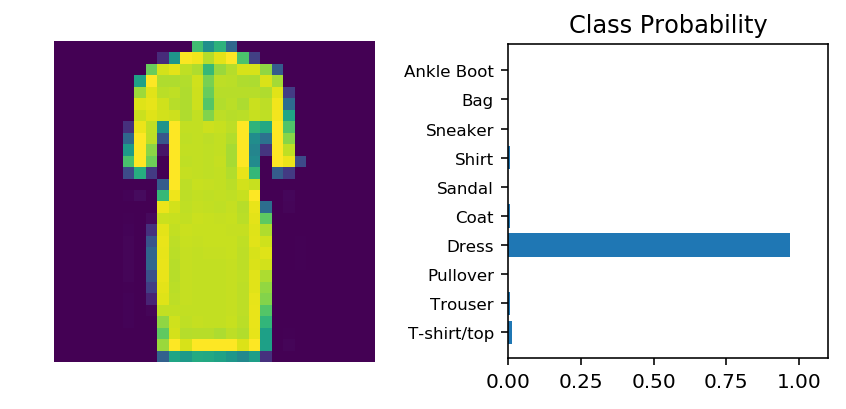

In [7]:
## Exercise 4.4: (see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

# Testataan verkkoa seuraavaksi testidatalla
dataiter = iter(testloader)
# Next ottaa yhden mini-batchin eli 64, 64 kuvaa
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

# Nopeutetaan laskentaa ottamalla automaattinen gradientinlasku pois päältä
with torch.no_grad():
    logps = model(img)

# Verkon ulostulot/lähdöt (output) ovat logaritmisiä todennäköisyyksiä
# Joten otetaan exponenttifunktio siitä
ps = torch.exp(logps)

# Plotataan kuva sekä todennäköisyydet
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Reflection

- Does network Training Loss decrease monotonously? And why this is important?
- Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 


*Your answers here...*

### Does network Training Loss decrease monotonously? And why this is important?

Verkon virhe laskee tasaisesti niin kuin kuuluisikin, jos kaikki on mennyt oikein. Kun virhe laskee, huomataan että verkko lähtee oppimaan. 

### Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 

- Verkko on epävarma, jos kuvassa oleva kappale on epäselvä ja muistuttaa useampaa muuta kappaletta. Esimerkiksi paitojen ja takkien kanssa todennäköisyykissä esiintyy suurempaa hajontaa.
- Kun testataan verkkoa vain yhdellä koulutuskierroksella uudestaan, pitää muistaa restartata kerneli ja sitten ajaa vasta koodi. Muuten ei huomaa mitään eroa epochien määrän muutoksessa, sillä edelliset ajot ovat muistissa. Yhdellä ajolla virhe on noin 2-3 kertaa suurempi, kuin viidennellä epochilla. 